In [122]:
import torch
from torch.utils.data.dataset import Dataset
import pandas as pd
import numpy as np 
import imageio #For reading image

In [14]:
from torchvision import transforms

In [18]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train_index1.csv')
df.head()

,file_path,label
0,/data/examples/flower_classification/train/tul...,tulip
1,/data/examples/flower_classification/train/tul...,tulip
2,/data/examples/flower_classification/train/tul...,tulip
3,/data/examples/flower_classification/train/tul...,tulip
4,/data/examples/flower_classification/train/tul...,tulip


# Make custom dataset from the pandas dataframe

In [67]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        
        '''
        自定義Dataset 要用class 繼承torchvision內的dataset class
        init 裡面要先將資料的資訊先定義跟取出
        get item裡面要回傳資料跟標籤
        len 裡面要回傳總共的資料量
        '''
        # Transforms
        #定義圖片要進行的transform方式
        self.to_tensor = transforms.ToTensor()
        
        # Read the csv file
        # 讀入有path 和 label的csv file
        self.data_info = pd.read_csv(csv_path)
        
        # First column contains the image paths
        #第一個column要指定路徑
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        
        # Second column is the labels
        #第二個column指定標籤
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        
        # Calculate len
        #計算總共有的資料量
        self.data_len = len(self.data_info.index)

        #如果有需要做data transformation ，可以用這種方式加進去：
#         self.transformations = \
#             transforms.Compose([transforms.CenterCrop(100),
#                         transforms.ToTensor()])

    def __getitem__(self, index):
        # Get image name from the pandas df
        #取出資料路徑
        single_image_name = self.image_arr[index]
        
        # Open image
        #讀取圖片
        img_as_img = imageio.imread(single_image_name, pilmode='RGB')
        
        # Transform image to tensor
        #將圖片轉成tensor
        img_as_tensor = self.to_tensor(img_as_img)
        
        #加入data trasformation
        #data = self.trasnformations(data)

        # Get label(class) of the image based on the cropped pandas column
        #取出相對硬的label
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len

# 建立dataset function

In [68]:
data = CustomDatasetFromImages(csv_path='train_index1.csv')

In [100]:
# 取出dataset 內的資料
img = next(iter(data))

In [119]:
# 要先將維度transpose
img_np = img[0].numpy().transpose((1, 2, 0))

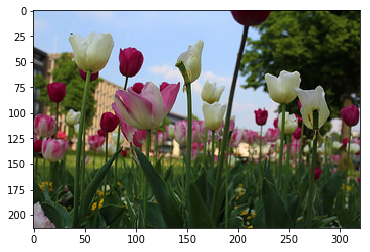

In [121]:
plt.imshow(img_np)